# This COLAB shows you how to use a Rocket for Superresolution

In this example you will learn how to use a Rocket to improve the resolution of an image. 

Expected time for this tutorial **10 min**

### How to use Jupyter Notebooks or Google Colab

In notebooks we can run code in so called cells. 

Each cell can be **run** by either selecting the cell and clicking on the run/play icon on the left of the cell or by the keyboard shortcut *shift-enter*

### First we need to install the rocketbase pip package

To use rocketbase we will need to install the pip package `rocketbase`. We can use the following command in colab to install the package.

In [0]:
!pip install rocketbase

### Now we can load our dependencies

* We use PyTorch to work with deep neural networks.
* We use rocketbase to use Rockets
* We use PIL (pillow) for loading images

In [0]:
import torch
from rocketbase import Rocket
from PIL import Image

### Let's load an image

You can change the url with another image if you want. Be careful, the bigger the image the longer takes the computation.

The following command will load the image from the given URL into a `PIL.Image` object and saves it into `img`

In [0]:
# first we need download the image to use it in this colab notebook
!wget http://www.petbusiness.com/web_cats.png

--2019-05-07 11:44:04--  http://www.petbusiness.com/web_cats.png
Resolving www.petbusiness.com (www.petbusiness.com)... 50.16.209.64
Connecting to www.petbusiness.com (www.petbusiness.com)|50.16.209.64|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137098 (134K) [image/png]
Saving to: ‘web_cats.png.3’

web_cats.png.3      100%[===================>] 133.88K  --.-KB/s    in 0.06s   

2019-05-07 11:44:05 (2.04 MB/s) - ‘web_cats.png.3’ saved [137098/137098]



In [0]:
img = Image.open('web_cats.png')

### Let's have a look at the image before we apply superresolution

In notebooks we can display the image by simply calling it.

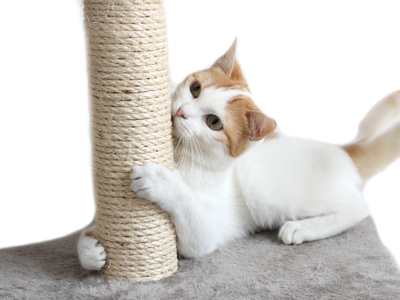

In [0]:
img

### Now we use land the Rocket and run the image through it

For this example we use the **igor/esrgan** Rocket. This Rocket can be used to improve the resolution of an input image.

First, we will land the Rocket using the **land** command.
We will then run the image through our model. We first call **preprocess** to convert the image into a PyTorch tensor. Then we run the tensor through our model. Finally, we use the **postprocess** method to convert the output into human readable format.

> ***Note that we use the `torch.no_grad()` namespace to prevent tracking of any gradients***

This process will take some time...

In [0]:
# land a Rocket
model = Rocket.land('igor/esrgan').eval()

Looking for the Rocket 'esrgan' made by 'igor'...
1 model versions found from the database.
Rocket has already landed. Using the local version:igor_esrgan_c75ad0b673d4927afee813dd7fd3ae3afcc6cb0d
Let's prepare the Rocket...


In [0]:
# processs the image with our Rocket
with torch.no_grad():
  img_tensor = model.preprocess(img)
  out = model(img_tensor)
  img_out = model.postprocess(out)

### Now let's have a look at the output image

In [0]:
img_out